# Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)


### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
import common
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from typing import Tuple

np.random.seed(4155)


def cross_val(x_data:np.ndarray, y_data:np.ndarray, model= LinearRegression(),k_folds_from = 5,k_folds_to = 11)-> Tuple[list, list]:

    numb_of_its = k_folds_to-k_folds_from
    
    mean_MSE_test = np.zeros(numb_of_its)
    mean_MSE_train = np.zeros(numb_of_its)
    
    inds = np.arange(n)
    #shuffle indicies to create random folds: 
    np.random.shuffle(inds)
    
    #create array for plotting:
    folds = np.zeros(numb_of_its)
    for fold in range(k_folds_from,k_folds_to):
        #split inds into multiple sub-arrays of equal or aprox equal size: 
        fold_inds = np.array_split(inds, fold)
        MSE_test = np.zeros(fold)
        MSE_train = np.zeros(fold)
        folds[fold-k_folds_from] = fold 
        for k in range(fold):
            #get array elements at indx k from folds_inds and use as test data: 
            x_test = x_data[fold_inds[k],:]
            y_test = y_data[fold_inds[k]]
        # print(f"x_test.shape: {x_test.shape}")

            #create training data by removing test-indicies from data
            x_train = np.delete(arr = x_data, obj = fold_inds[k],axis = 0)
            y_train = np.delete(y_data, fold_inds[k])
            
            # Scale data: 
            scaler = StandardScaler()
            scaler.fit(x_train)
            x_train_scaled = scaler.transform(x_train)
            x_test_scaled = scaler.transform(x_test)
            
            #fit model and predict on test data:
            clf =  model.fit(x_train_scaled, y_train)
            y_pred = clf.predict(x_test_scaled)
            #predict on train data:
            y_fit = clf.predict(x_train_scaled)
            # print(f"y_test.shape: {y_test.shape}, y_pred.shape = {y_pred.shape}")
            
            MSE_test[k] = np.mean((y_test - y_pred)**2) 
            MSE_train[k] = np.mean((y_train - y_fit)**2) 
            
        mean_MSE_test[fold-k_folds_to] = np.mean(MSE_test)
        mean_MSE_train[fold-k_folds_to] = np.mean(MSE_train)
        
    return mean_MSE_test,mean_MSE_train, folds
     
        

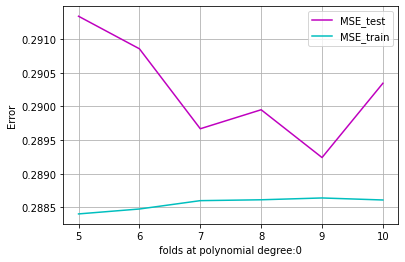

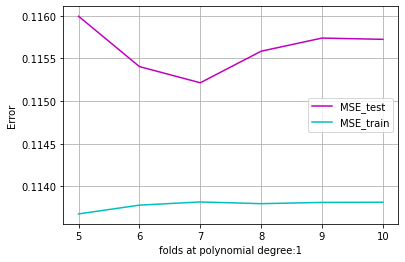

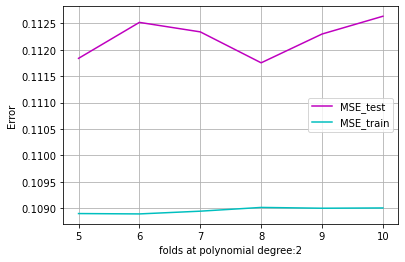

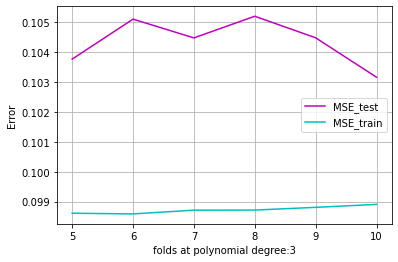

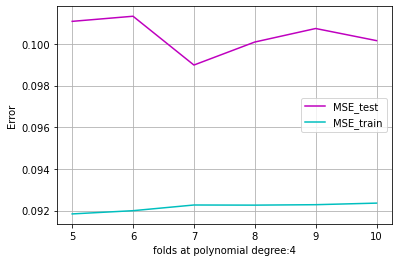

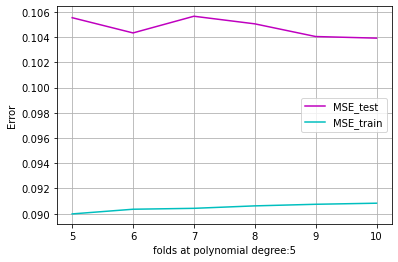

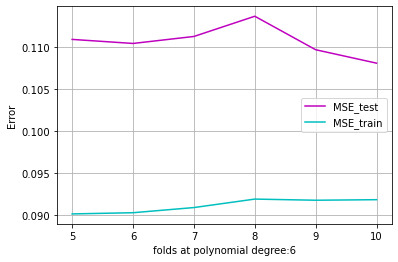

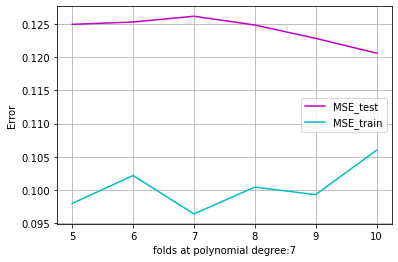

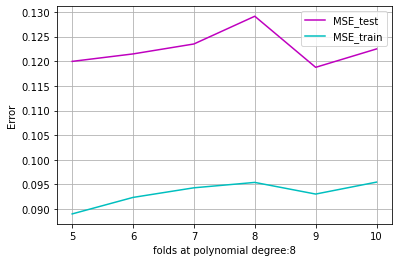

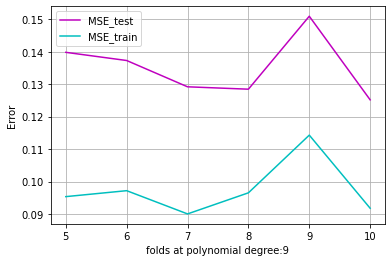

In [4]:

np.random.seed(4155)

# Generate the data.
n = 400
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
z = common.FrankeFunction(x, y) + 0.3*np.random.normal(0, size = n)

for degree in range(10):
    
    X = common.create_X(x, y, n=degree)  
    MSE_test, MSE_train, folds = cross_val(x_data= X,y_data=z)
    plt.plot(folds, MSE_test,"m", label='MSE_test')
    plt.plot(folds, MSE_train,"c", label='MSE_train')

    plt.xlabel(f"folds at polynomial degree:{degree}")
    plt.ylabel("Error")

    plt.grid(True)
    plt.legend()
    plt.show()